In [ ]:
# Courtesy https://www.kaggle.com/discussions/general/74235

from google.colab import files
files.upload()         # expire any previous token(s) and upload recreated token

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"andrewne","key":"b89c1607d0717984346397518250a3ab"}'}

In [ ]:
# Courtesy https://www.kaggle.com/discussions/general/74235

!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

rm: cannot remove '/root/.kaggle': No such file or directory
ref                                                              title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
lainguyn123/student-performance-factors                          Student Performance Factors                          94KB  2024-09-02 10:53:57           8130        173  1.0              
ironwolf404/laptop-price-dataset                                 Laptop Price - dataset                               25KB  2024-09-02 18:11:19           1490         26  1.0              
hanaksoy/customer-purchasing-behaviors                           Customer Purchasing Behaviors                         1KB  2024-09-01 22:18:07           4364         61  1.0         

In [ ]:
# Courtesy https://www.kaggle.com/discussions/general/74235

# Get the name by going to the dataset on kaggle and hitting get api code

dataset_name = "debashishsau/aslamerican-sign-language-aplhabet-dataset"


In [ ]:
# Courtesy https://www.kaggle.com/discussions/general/74235

zip_name = dataset_name.split('/')[-1]

In [ ]:
# Courtesy https://www.kaggle.com/discussions/general/74235

!kaggle datasets download -d {dataset_name}
!unzip -q ./{zip_name}.zip -d .

Dataset URL: https://www.kaggle.com/datasets/debashishsau/aslamerican-sign-language-aplhabet-dataset
License(s): CC0-1.0
100% 4.19G/4.20G [00:33<00:00, 292MB/s]
100% 4.20G/4.20G [00:33<00:00, 134MB/s]


In [ ]:
# Courtesy: https://www.tensorflow.org/tutorials/images/data_augmentation

# Import everything we will need

import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import random

from tensorflow.keras import layers

import pandas as pd

In [ ]:
# Choose a batch size equal to 32 images
batch_size = 32

# Choose the directory where the training data is stored
data_dir = "/content/ASL_Alphabet_Dataset/asl_alphabet_train"

In [ ]:
# Create an array that contains the names of each category.
# 26 letters in english alphabet + (delete, nothing, space)
folders = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R',"S","T","U","V","W","X","Y","Z","del","nothing","space"]

In [ ]:
# Create an array to hold the counts of each class.
counts = []

In [ ]:
# Set the number of samples per class you would like to work with
# We use this to work with a smaller subset of the data initially.
samples_per_class = 1000

In [ ]:
# https://stackoverflow.com/questions/59952200/move-a-random-sample-of-files-from-one-folder-to-another
# I took code from the above link and adapted it to remove random files instead of move random files

# Loop through each folder in the list of folders (one for each category)
for folder in folders:

  # Save the directory of the current folder
  source = data_dir + '/' + folder + '/'

  # Get the files contained in the above folder
  files = os.listdir(source)

  # Append the counts to the array that holds the count for later use
  counts.append(len(files))

  # Get the total number of samples that exist in the file
  number_of_samples = len(files)

  # Randomly select files and remove them until there are only samples_per_class samples lefts
  for file_name in random.sample(files, number_of_samples - samples_per_class):
      os.remove(os.path.join(source, file_name))


In [ ]:
folders[28]

'space'

In [ ]:
counts[28]

7071

EDA - Simplified


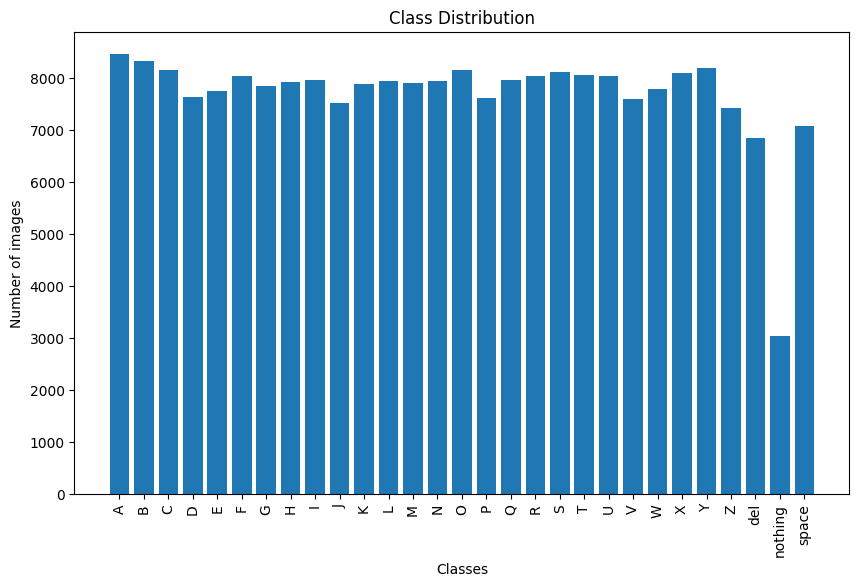

In [ ]:
# Plot the class distribution
plt.figure(figsize=(10, 6))
plt.bar(folders, counts)
plt.xlabel("Classes")
plt.ylabel("Number of images")
plt.title("Class Distribution")
plt.xticks(rotation=90)
plt.show()

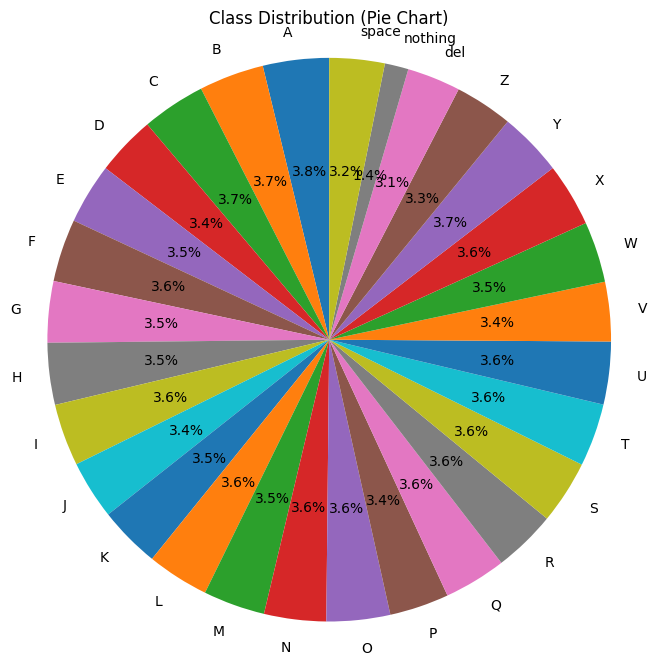

In [ ]:
# Plot the class distribution as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    counts,
    labels=folders,
    autopct="%1.1f%%",
    startangle=90,
)
plt.title("Class Distribution (Pie Chart)")
plt.axis("equal")  # Equal aspect ratio ensures the pie chart is circular
plt.show()

EDA - Original

In [ ]:
"""
path = "/mnt/c/Users/mbele/desktop/ASL_Alphabet_Dataset/asl_alphabet_train"

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    path, labels="inferred", shuffle=True
)
"""

'\npath = "/mnt/c/Users/mbele/desktop/ASL_Alphabet_Dataset/asl_alphabet_train"\n\ntrain_ds = tf.keras.preprocessing.image_dataset_from_directory(\n    path, labels="inferred", shuffle=True\n)\n'

In [ ]:
"""
import matplotlib.pyplot as plt
from collections import Counter

class_names = train_ds.class_names

labels = []
for _, label_batch in train_ds:
    labels.extend(label_batch.numpy())

# Count the occurrences of each class
label_count = dict(Counter(labels))


label_count_named = {
    class_names[k]: v for k, v in label_count.items()
}  # labels to class names

# Plot the class distribution
plt.figure(figsize=(10, 6))
plt.bar(label_count_named.keys(), label_count_named.values())
plt.xlabel("Classes")
plt.ylabel("Number of images")
plt.title("Class Distribution")
plt.xticks(rotation=90)
plt.show()
"""

'\nimport matplotlib.pyplot as plt\nfrom collections import Counter\n\nclass_names = train_ds.class_names\n\nlabels = []\nfor _, label_batch in train_ds:\n    labels.extend(label_batch.numpy())\n\n# Count the occurrences of each class\nlabel_count = dict(Counter(labels))\n\n\nlabel_count_named = {\n    class_names[k]: v for k, v in label_count.items()\n}  # labels to class names\n\n# Plot the class distribution\nplt.figure(figsize=(10, 6))\nplt.bar(label_count_named.keys(), label_count_named.values())\nplt.xlabel("Classes")\nplt.ylabel("Number of images")\nplt.title("Class Distribution")\nplt.xticks(rotation=90)\nplt.show()\n'

In [ ]:
"""
# Plot the class distribution as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    label_count_named.values(),
    labels=label_count_named.keys(),
    autopct="%1.1f%%",
    startangle=90,
)
plt.title("Class Distribution (Pie Chart)")
plt.axis("equal")  # Equal aspect ratio ensures the pie chart is circular
plt.show()
"""

'\n# Plot the class distribution as a pie chart\nplt.figure(figsize=(8, 8))\nplt.pie(\n    label_count_named.values(),\n    labels=label_count_named.keys(),\n    autopct="%1.1f%%",\n    startangle=90,\n)\nplt.title("Class Distribution (Pie Chart)")\nplt.axis("equal")  # Equal aspect ratio ensures the pie chart is circular\nplt.show()\n'

In [ ]:
# Courtesy of Humam, this is the size resnet expects
image_size_resnet = (224,224)

In [ ]:
# From: https://www.tensorflow.org/tutorials/load_data/images
# Loading the training data
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir,
                                                               labels='inferred',
                                                               validation_split=0.2,
                                                               subset="training",
                                                               image_size = image_size_resnet,
                                                               seed=123,
                                                               batch_size=batch_size,
                                                               shuffle=True)

Found 29000 files belonging to 29 classes.
Using 23200 files for training.


In [ ]:
# From: https://www.tensorflow.org/tutorials/load_data/images
# Load the validation data

val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir,
                                                               labels='inferred',
                                                               validation_split=0.2,
                                                               subset="validation",
                                                               image_size = image_size_resnet,
                                                               seed=123,
                                                               batch_size=batch_size,
                                                               shuffle=True)

Found 29000 files belonging to 29 classes.
Using 5800 files for validation.


In [ ]:
# From : https://www.tensorflow.org/tutorials/load_data/images
# Get the class names and print them
class_names = train_ds.class_names
print(class_names)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']


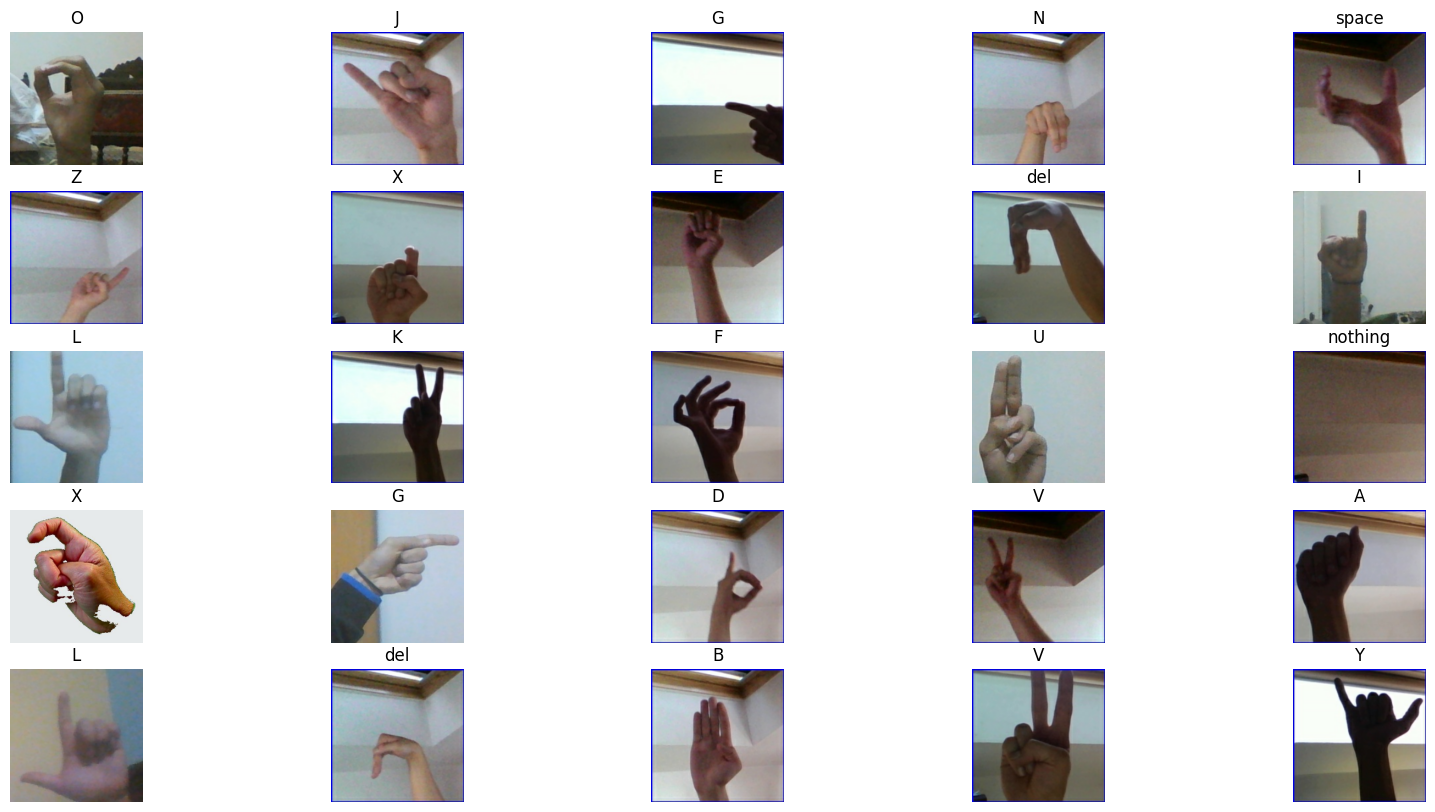

In [ ]:
# From : https://www.tensorflow.org/tutorials/load_data/images

# Print some example images just to get a look at them
plt.figure(figsize=(20, 10))
for images, labels in train_ds.take(1):
  for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Data Augmentation Code - Working but not currently in use for baseline testing

In [ ]:
"""
# From: https://www.tensorflow.org/tutorials/images/data_augmentation

img_size_resnet = 224

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(img_size_resnet, img_size_resnet),
  layers.Rescaling(1./255)
])
"""

'\n# From: https://www.tensorflow.org/tutorials/images/data_augmentation\n\nimg_size_resnet = 224\n\nresize_and_rescale = tf.keras.Sequential([\n  layers.Resizing(img_size_resnet, img_size_resnet),\n  layers.Rescaling(1./255)\n])\n'

In [ ]:
"""

# From: https://www.tensorflow.org/tutorials/images/data_augmentation

# Info about GaussianNoise: https://www.tensorflow.org/api_docs/python/tf/keras/layers/GaussianNoise
# Info about RandomBrightness: https://www.tensorflow.org/api_docs/python/tf/keras/layers/RandomBrightness
# Info about RandomContrast: https://www.tensorflow.org/api_docs/python/tf/keras/layers/RandomContrast

data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
  layers.GaussianNoise(0.1),
  layers.RandomBrightness(-0.5, value_range=(0, 1), seed=123),
  layers.RandomContrast(0.5, seed=123),

])

"""

'\n\n# From: https://www.tensorflow.org/tutorials/images/data_augmentation\n\n# Info about GaussianNoise: https://www.tensorflow.org/api_docs/python/tf/keras/layers/GaussianNoise\n# Info about RandomBrightness: https://www.tensorflow.org/api_docs/python/tf/keras/layers/RandomBrightness\n# Info about RandomContrast: https://www.tensorflow.org/api_docs/python/tf/keras/layers/RandomContrast\n\ndata_augmentation = tf.keras.Sequential([\n  layers.RandomFlip("horizontal_and_vertical"),\n  layers.RandomRotation(0.2),\n  layers.GaussianNoise(0.1),\n  layers.RandomBrightness(-0.5, value_range=(0, 1), seed=123),\n  layers.RandomContrast(0.5, seed=123),\n\n])\n\n'

In [ ]:
"""
number_of_augmentations = 100
"""

'\nnumber_of_augmentations = 100\n'

In [ ]:
"""

# Info about moving random sample of files.
# Using this info to select randomly number_of_augmentaiton images from each class and augment them
# https://stackoverflow.com/questions/59952200/move-a-random-sample-of-files-from-one-folder-to-another

for class_name in class_names:

  source = data_dir + '/' + class_name + '/'

  files = os.listdir(source)

  for file_name in random.sample(files, number_of_augmentations):

      # Load image info here: https://www.tensorflow.org/api_docs/python/tf/keras/utils/load_img
      original_image = tf.keras.utils.load_img(source+file_name)

      # Convert PIL image to tensor
      # Courtesy of https://stackoverflow.com/questions/41236657/tensorflow-open-a-pil-image
      original_image = tf.keras.utils.img_to_array(original_image)

      # Rescale and resize image
      original_image = resize_and_rescale(original_image)

      # Augment image
      augmented_image = data_augmentation(original_image)

      #plt.imshow(augmented_image)

      #os.remove(os.path.join(source, file_name))


      # Save the image
      tf.keras.utils.save_img(source+'augmented_' + file_name, augmented_image)


      #print('augmented_' + file_name)
"""


"\n\n# Info about moving random sample of files.\n# Using this info to select randomly number_of_augmentaiton images from each class and augment them\n# https://stackoverflow.com/questions/59952200/move-a-random-sample-of-files-from-one-folder-to-another\n\nfor class_name in class_names:\n\n  source = data_dir + '/' + class_name + '/'\n\n  files = os.listdir(source)\n\n  for file_name in random.sample(files, number_of_augmentations):\n\n      # Load image info here: https://www.tensorflow.org/api_docs/python/tf/keras/utils/load_img\n      original_image = tf.keras.utils.load_img(source+file_name)\n\n      # Convert PIL image to tensor\n      # Courtesy of https://stackoverflow.com/questions/41236657/tensorflow-open-a-pil-image\n      original_image = tf.keras.utils.img_to_array(original_image)\n\n      # Rescale and resize image\n      original_image = resize_and_rescale(original_image)\n\n      # Augment image\n      augmented_image = data_augmentation(original_image)\n\n      #plt.im

In [ ]:
# From: https://www.tensorflow.org/tutorials/load_data/images

# Normalize the pixel values between 0-1

normalization_layer = tf.keras.layers.Rescaling(1./255)

In [ ]:
# From: https://www.tensorflow.org/tutorials/load_data/images

# Normalize the pixel values of the train_ds

normalized_train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_train_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [ ]:
# From: https://www.tensorflow.org/tutorials/load_data/images

# Normalize the pixel values of the val_ds

normalized_val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_val_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [ ]:
# Resnet 50 source
# https://stackoverflow.com/questions/57108173/adding-layers-to-the-top-of-resnetkeras-valueerror-input-0-is-incompatible-w

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

base_model.trainable = False

#add custom layers for ASL classification
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dense(29, activation='softmax')(x)  # 26 letters + 3 extra classes

model_resnet = Model(inputs=base_model.input, outputs=x)

# Changed categorical_crossentropy to sparse_categorical_crossentropy
# was getting error
# Found suggestion here: https://stackoverflow.com/questions/78365339/arguments-target-and-output-must-have-the-same-rank-ndim
model_resnet.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Train the resnet50 model
history_resnet = model_resnet.fit(
    normalized_train_ds,
    validation_data=normalized_val_ds,
    epochs=10
)

Epoch 1/10
725/725 ━━━━━━━━━━━━━━━━━━━━ 103s 123ms/step - accuracy: 0.0409 - loss: 5.7814 - val_accuracy: 0.0821 - val_loss: 3.2236
Epoch 2/10
725/725 ━━━━━━━━━━━━━━━━━━━━ 88s 121ms/step - accuracy: 0.0774 - loss: 3.1674 - val_accuracy: 0.0938 - val_loss: 3.0280
Epoch 3/10
725/725 ━━━━━━━━━━━━━━━━━━━━ 137s 114ms/step - accuracy: 0.1021 - loss: 2.9889 - val_accuracy: 0.0950 - val_loss: 3.0901
Epoch 4/10
725/725 ━━━━━━━━━━━━━━━━━━━━ 148s 122ms/step - accuracy: 0.1368 - loss: 2.8804 - val_accuracy: 0.1333 - val_loss: 2.8842
Epoch 5/10
725/725 ━━━━━━━━━━━━━━━━━━━━ 83s 114ms/step - accuracy: 0.1485 - loss: 2.7968 - val_accuracy: 0.1588 - val_loss: 2.7176
Epoch 6/10
725/725 ━━━━━━━━━━━━━━━━━━━━ 88s 121ms/step - accuracy: 0.1580 - loss: 2.7359 - val_accuracy: 0.1712 - val_loss: 2.6635
Epoch 7/10
725/725 ━━━━━━━━━━━━━━━━━━━━ 83s 114ms/step - accuracy: 0.1639 - loss: 2.6962 - val_accuracy: 0.1747 - val_loss: 2.7529
Epoch 8/10
725/725 ━━━━━━━━━━━━━━━━━━━━ 83s 114ms/step - accuracy: 0.1740 - loss

In [ ]:
# Source: https://www.tensorflow.org/tutorials/keras/save_and_load

# Save the weights
#model_resnet.save_weights('./model_resnet_trained.weights.h5')

# Save the entire model as a `.keras` zip archive.
model_resnet.save('model_resnet.keras')


In [ ]:
# Source: https://www.tensorflow.org/tutorials/keras/save_and_load

new_model = tf.keras.models.load_model('model_resnet.keras')

# Show the model architecture
new_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 177,774,553 (678.16 MB)

 Trainable params: 51,395,613 (196.06 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 102,791,228 (392.12 MB)

In [ ]:
# These sizes are provided courtesy of humam
image_size_inception = (299, 299)

In [ ]:
# From: https://www.tensorflow.org/tutorials/load_data/images

# Load the training_ds
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir,
                                                               labels='inferred',
                                                               validation_split=0.2,
                                                               subset="training",
                                                               image_size = image_size_inception,
                                                               seed=123,
                                                               batch_size=batch_size,
                                                               shuffle=True)

Found 29000 files belonging to 29 classes.
Using 23200 files for training.


In [ ]:
# From: https://www.tensorflow.org/tutorials/load_data/images

# Load the validation_ds

val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir,
                                                               labels='inferred',
                                                               validation_split=0.2,
                                                               subset="validation",
                                                               image_size = image_size_inception,
                                                               seed=123,
                                                               batch_size=batch_size,
                                                               shuffle=True)

Found 29000 files belonging to 29 classes.
Using 5800 files for validation.


In [ ]:
# From: https://www.tensorflow.org/tutorials/load_data/images

# normalize pixel values between 0-1

normalization_layer = tf.keras.layers.Rescaling(1./255)

In [ ]:
# From: https://www.tensorflow.org/tutorials/load_data/images

# normalize training dataset

normalized_train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_train_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.008454671 0.9716602


In [ ]:
# From: https://www.tensorflow.org/tutorials/load_data/images

# normalize validation dataset

normalized_val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_val_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [ ]:
# Initialize the Inception V3 model

from tensorflow.keras.applications import InceptionV3

base_model_inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

base_model_inception.trainable = False

# Add custom layers
x = Flatten()(base_model_inception.output)
x = Dense(512, activation='relu')(x)
x = Dense(29, activation='softmax')(x)

model_inception = Model(inputs=base_model_inception.input, outputs=x)

model_inception.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [43]:
# Train the inception V3 model
history_inception = model_inception.fit(
    normalized_train_ds,
    validation_data=normalized_val_ds,
    epochs=10
)


Epoch 1/10
725/725 ━━━━━━━━━━━━━━━━━━━━ 151s 179ms/step - accuracy: 0.3818 - loss: 8.6584 - val_accuracy: 0.7743 - val_loss: 0.6925
Epoch 2/10
725/725 ━━━━━━━━━━━━━━━━━━━━ 107s 148ms/step - accuracy: 0.8233 - loss: 0.5627 - val_accuracy: 0.8722 - val_loss: 0.4103
Epoch 3/10
725/725 ━━━━━━━━━━━━━━━━━━━━ 140s 145ms/step - accuracy: 0.9055 - loss: 0.2909 - val_accuracy: 0.8503 - val_loss: 0.5277
Epoch 4/10
725/725 ━━━━━━━━━━━━━━━━━━━━ 108s 149ms/step - accuracy: 0.9307 - loss: 0.2173 - val_accuracy: 0.8772 - val_loss: 0.4726
Epoch 5/10
725/725 ━━━━━━━━━━━━━━━━━━━━ 140s 146ms/step - accuracy: 0.9429 - loss: 0.1876 - val_accuracy: 0.8719 - val_loss: 0.5536
Epoch 6/10
725/725 ━━━━━━━━━━━━━━━━━━━━ 141s 145ms/step - accuracy: 0.9397 - loss: 0.2043 - val_accuracy: 0.8831 - val_loss: 0.5377
Epoch 7/10
725/725 ━━━━━━━━━━━━━━━━━━━━ 108s 149ms/step - accuracy: 0.9442 - loss: 0.2076 - val_accuracy: 0.8991 - val_loss: 0.4605
Epoch 8/10
725/725 ━━━━━━━━━━━━━━━━━━━━ 142s 148ms/step - accuracy: 0.9559 -

In [44]:
# Source: https://www.tensorflow.org/tutorials/keras/save_and_load

# Save the entire model as a `.keras` zip archive.
model_inception.save('model_inception.keras')

In [ ]:
# Source: https://www.tensorflow.org/tutorials/keras/save_and_load

new_model = tf.keras.models.load_model('model_inception.keras')

# Show the model architecture
new_model.summary()

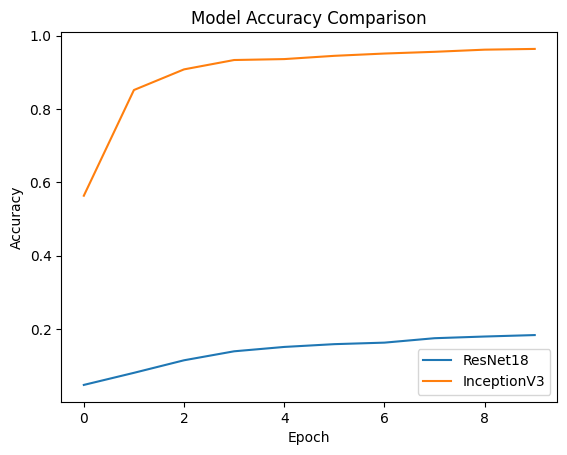

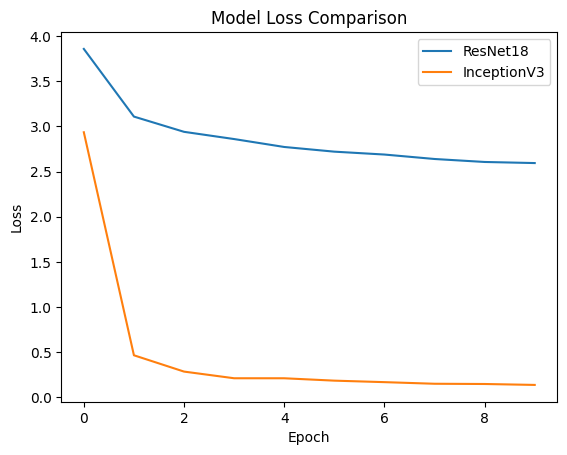

In [47]:
# Plot and compare the performance of both models

import matplotlib.pyplot as plt

#accuracy for both models
plt.plot(history_resnet.history['accuracy'], label='ResNet18')
plt.plot(history_inception.history['accuracy'], label='InceptionV3')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#loss for both models
plt.plot(history_resnet.history['loss'], label='ResNet18')
plt.plot(history_inception.history['loss'], label='InceptionV3')
plt.title('Model Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
